In [39]:
import pandas as pd
df = pd.read_csv('insurance_data.csv') #read the dataset
df.head() #show dataset

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [40]:
df.drop(["index", "PatientID"], axis=1, inplace=True) #drop columns that is not used for predictions
df.head() #show dataset again

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [41]:
df.info() #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [42]:
df.isnull().sum().sum() #return sum of null values

8

In [43]:
df.isnull().sum() #check columns that has null values

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [44]:
import numpy as np
np.mean(df["age"]) #check mean value for age column

38.07865168539326

In [45]:
df["age"] = df["age"].fillna(np.mean(df["age"])) #put age mean value for null age values
df.head() #show dataset again

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [46]:
df['age'].describe()

count    1340.000000
mean       38.078652
std        11.082175
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

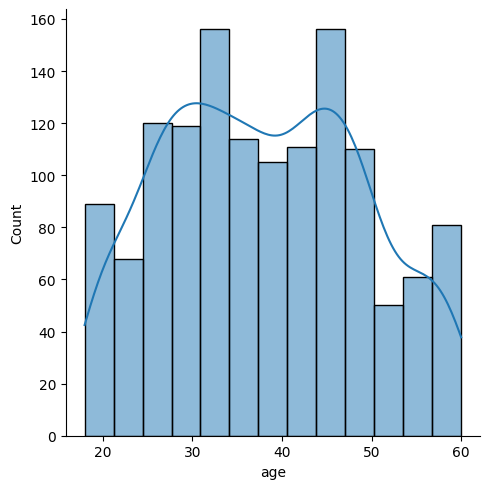

In [47]:
import seaborn as sns
sns.displot(df['age'],kde=True)

<Axes: ylabel='count'>

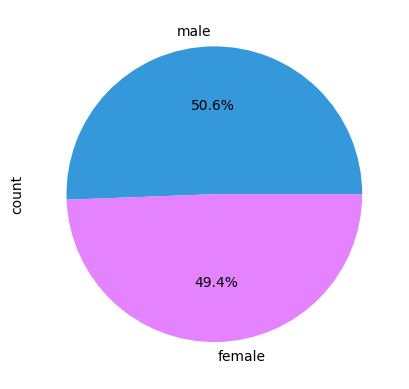

In [48]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%', colors = ['#3498db','#e582ff'])

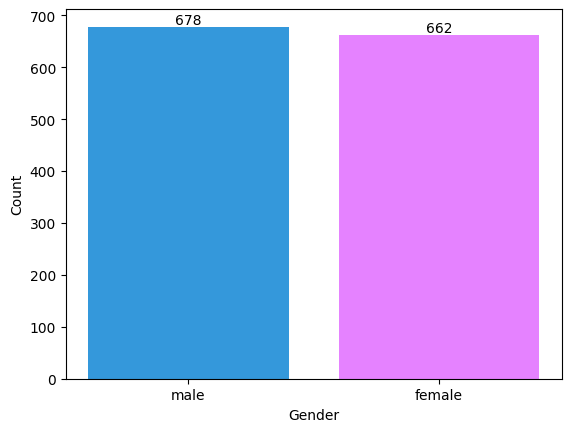

In [49]:
import matplotlib.pyplot as plt
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e582ff'])
for index, value in enumerate(gender_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

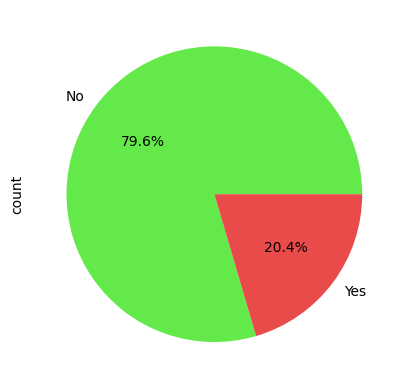

In [50]:
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%', colors = ['#64e94a','#e94a4a'])

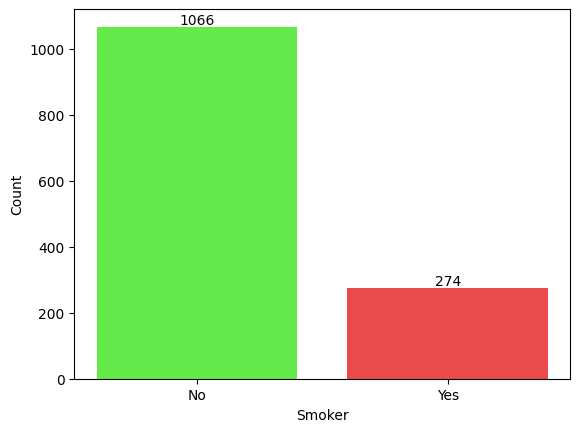

In [51]:
smoker_counts = df['smoker'].value_counts()
plt.bar(smoker_counts.index, smoker_counts.values, color=['#64e94a','#e94a4a'])
for index, value in enumerate(smoker_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

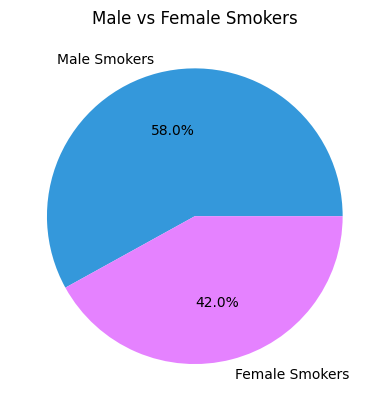

In [52]:
df['male_smokers'] = (df['gender'] == 'male') & (df['smoker'] == 'Yes')
df['female_smokers'] = (df['gender'] == 'female') & (df['smoker'] == 'Yes')

#count the number of male and female smokers
male_smoker_count = df['male_smokers'].sum()
female_smoker_count = df['female_smokers'].sum()

labels = ['Male Smokers', 'Female Smokers']
sizes = [male_smoker_count, female_smoker_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3498db','#e582ff'])
plt.title('Male vs Female Smokers')
plt.show()

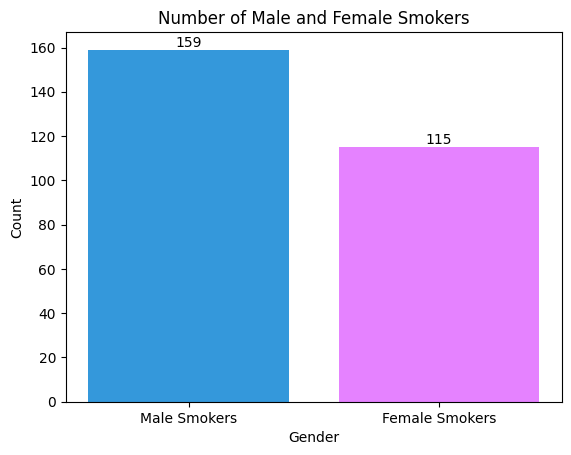

In [53]:
labels = ['Male Smokers', 'Female Smokers']
counts = [male_smoker_count, female_smoker_count]
plt.bar(labels, counts, color=['#3498db', '#e582ff'])
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('Number of Male and Female Smokers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

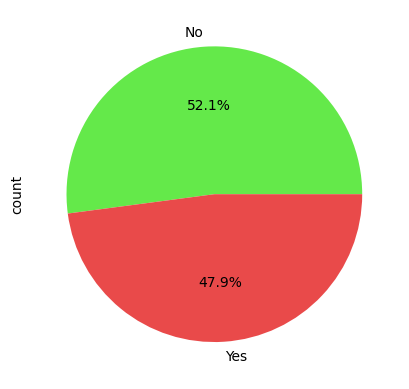

In [54]:
df['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%', colors=['#64e94a','#e94a4a'])

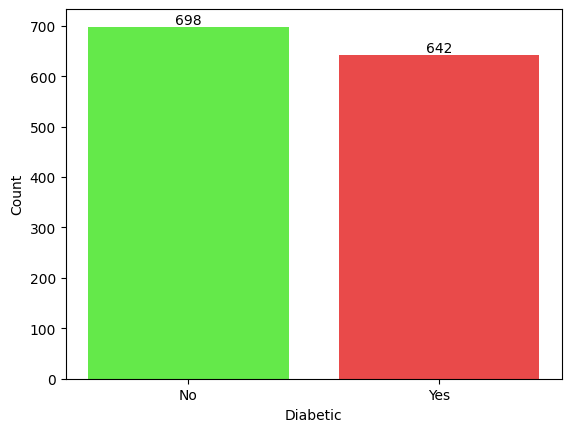

In [55]:
diabete_counts = df['diabetic'].value_counts()
plt.bar(diabete_counts.index, diabete_counts.values, color=['#64e94a','#e94a4a'])
for index, value in enumerate(diabete_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

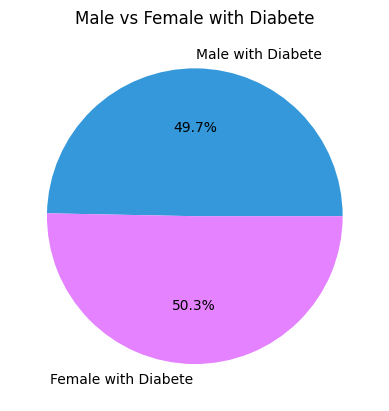

In [56]:
df['male_with_diabete'] = (df['gender'] == 'male') & (df['diabetic'] == 'Yes')
df['female_with_diabete'] = (df['gender'] == 'female') & (df['diabetic'] == 'Yes')

#count the number of male and female with diabete
diabetic_male_count = df['male_with_diabete'].sum()
diabetic_female_count = df['female_with_diabete'].sum()

labels = ['Male with Diabete', 'Female with Diabete']
sizes = [diabetic_male_count, diabetic_female_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3498db','#e582ff'])
plt.title('Male vs Female with Diabete')
plt.show()

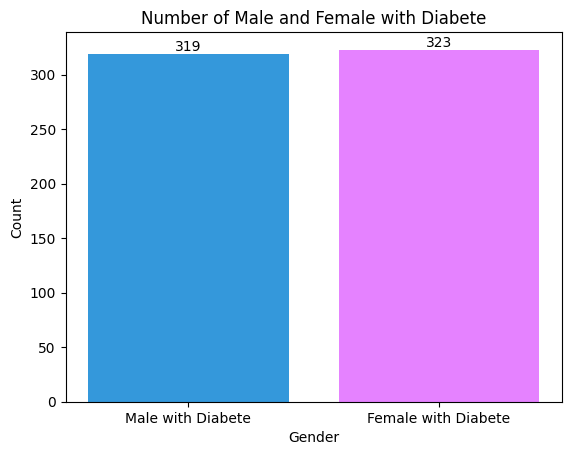

In [57]:
labels = ['Male with Diabete', 'Female with Diabete']
counts = [diabetic_male_count, diabetic_female_count]
plt.bar(labels, counts, color=['#3498db','#e582ff'])
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('Number of Male and Female with Diabete')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

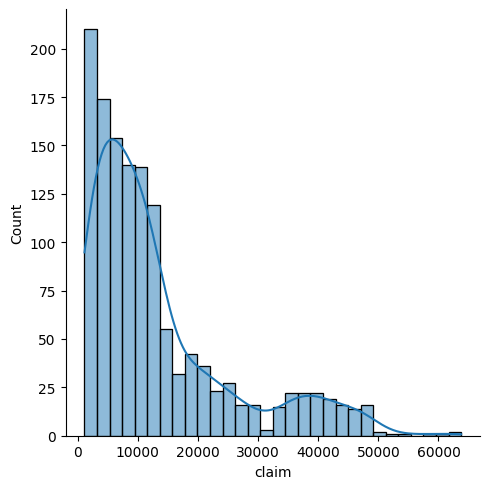

In [58]:
sns.displot(df['claim'],kde=True)

In [59]:
df.isnull().sum() #check columns that has null values

age                    0
gender                 0
bmi                    0
bloodpressure          0
diabetic               0
children               0
smoker                 0
region                 3
claim                  0
male_smokers           0
female_smokers         0
male_with_diabete      0
female_with_diabete    0
dtype: int64

In [60]:
df.info() #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1340 non-null   float64
 1   gender               1340 non-null   object 
 2   bmi                  1340 non-null   float64
 3   bloodpressure        1340 non-null   int64  
 4   diabetic             1340 non-null   object 
 5   children             1340 non-null   int64  
 6   smoker               1340 non-null   object 
 7   region               1337 non-null   object 
 8   claim                1340 non-null   float64
 9   male_smokers         1340 non-null   bool   
 10  female_smokers       1340 non-null   bool   
 11  male_with_diabete    1340 non-null   bool   
 12  female_with_diabete  1340 non-null   bool   
dtypes: bool(4), float64(3), int64(2), object(4)
memory usage: 99.6+ KB


In [61]:
from sklearn.preprocessing import LabelEncoder #to convert object values to int32
df["region"] = LabelEncoder().fit_transform(df["region"]) #first need to convert region object value to int32
np.mean(df["region"]) #then check mean value for region

1.6335820895522388

In [63]:
df["region"] = df["region"].fillna(2) #put value 2 for null region values
df.head() #show dataset again

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,male_smokers,female_smokers,male_with_diabete,female_with_diabete
0,39.000000,male,23.2,91,Yes,0,No,2,1121.87,False,False,True,False
1,24.000000,male,30.1,87,No,0,No,2,1131.51,False,False,False,False
2,38.078652,male,33.3,82,Yes,0,No,2,1135.94,False,False,True,False
3,38.078652,male,33.7,80,No,0,No,1,1136.40,False,False,False,False
4,38.078652,male,34.1,100,No,0,No,1,1137.01,False,False,False,False


In [64]:
random_bools = np.random.choice([True, False], size=len(df))
df['will_claim'] = random_bools
df['will_claim'] = df['will_claim'].replace({True: 'Yes', False: 'No'})
df.head() #show dataset again

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,male_smokers,female_smokers,male_with_diabete,female_with_diabete,will_claim
0,39.000000,male,23.2,91,Yes,0,No,2,1121.87,False,False,True,False,No
1,24.000000,male,30.1,87,No,0,No,2,1131.51,False,False,False,False,Yes
2,38.078652,male,33.3,82,Yes,0,No,2,1135.94,False,False,True,False,Yes
3,38.078652,male,33.7,80,No,0,No,1,1136.40,False,False,False,False,No
4,38.078652,male,34.1,100,No,0,No,1,1137.01,False,False,False,False,No


In [65]:
df.isnull().sum() #check columns again if any has null values

age                    0
gender                 0
bmi                    0
bloodpressure          0
diabetic               0
children               0
smoker                 0
region                 0
claim                  0
male_smokers           0
female_smokers         0
male_with_diabete      0
female_with_diabete    0
will_claim             0
dtype: int64

In [66]:
df.info() #check data types again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1340 non-null   float64
 1   gender               1340 non-null   object 
 2   bmi                  1340 non-null   float64
 3   bloodpressure        1340 non-null   int64  
 4   diabetic             1340 non-null   object 
 5   children             1340 non-null   int64  
 6   smoker               1340 non-null   object 
 7   region               1340 non-null   int32  
 8   claim                1340 non-null   float64
 9   male_smokers         1340 non-null   bool   
 10  female_smokers       1340 non-null   bool   
 11  male_with_diabete    1340 non-null   bool   
 12  female_with_diabete  1340 non-null   bool   
 13  will_claim           1340 non-null   object 
dtypes: bool(4), float64(3), int32(1), int64(2), object(4)
memory usage: 104.8+ KB


In [67]:
#convert remaining object and boolean data types to int64 for traning models
df["gender"] = LabelEncoder().fit_transform(df["gender"])
df["diabetic"] = LabelEncoder().fit_transform(df["diabetic"])
df["smoker"] = LabelEncoder().fit_transform(df["smoker"])
df["male_smokers"] = LabelEncoder().fit_transform(df["male_smokers"])
df["female_smokers"] = LabelEncoder().fit_transform(df["female_smokers"])
df["male_with_diabete"] = LabelEncoder().fit_transform(df["male_with_diabete"])
df["female_with_diabete"] = LabelEncoder().fit_transform(df["female_with_diabete"])
df["will_claim"] = LabelEncoder().fit_transform(df["will_claim"])
df.head() #show dataset again

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,male_smokers,female_smokers,male_with_diabete,female_with_diabete,will_claim
0,39.000000,1,23.2,91,1,0,0,2,1121.87,0,0,1,0,0
1,24.000000,1,30.1,87,0,0,0,2,1131.51,0,0,0,0,1
2,38.078652,1,33.3,82,1,0,0,2,1135.94,0,0,1,0,1
3,38.078652,1,33.7,80,0,0,0,1,1136.40,0,0,0,0,0
4,38.078652,1,34.1,100,0,0,0,1,1137.01,0,0,0,0,0


In [68]:
df.info() #check data types again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1340 non-null   float64
 1   gender               1340 non-null   int32  
 2   bmi                  1340 non-null   float64
 3   bloodpressure        1340 non-null   int64  
 4   diabetic             1340 non-null   int32  
 5   children             1340 non-null   int64  
 6   smoker               1340 non-null   int32  
 7   region               1340 non-null   int32  
 8   claim                1340 non-null   float64
 9   male_smokers         1340 non-null   int64  
 10  female_smokers       1340 non-null   int64  
 11  male_with_diabete    1340 non-null   int64  
 12  female_with_diabete  1340 non-null   int64  
 13  will_claim           1340 non-null   int32  
dtypes: float64(3), int32(5), int64(6)
memory usage: 120.5 KB


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#setting the target variable
X = df.drop('will_claim', axis=1)
y = df['will_claim']

#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#creating logistic regression model
#creating the logistic regression model with a regularization parameter
model = LogisticRegression(max_iter=1000, C=0.5)

#training the model with training data
model.fit(X_train, y_train)

#cross-calidation
cv_scores = cross_val_score(model, X, y, cv=5)
average_cv_accuracy = np.mean(cv_scores)
print(f"Average Cross-Validation Accuracy: {average_cv_accuracy}")

#evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {accuracy}")

Average Cross-Validation Accuracy: 0.49925373134328355
Test Set Accuracy: 0.5199004975124378


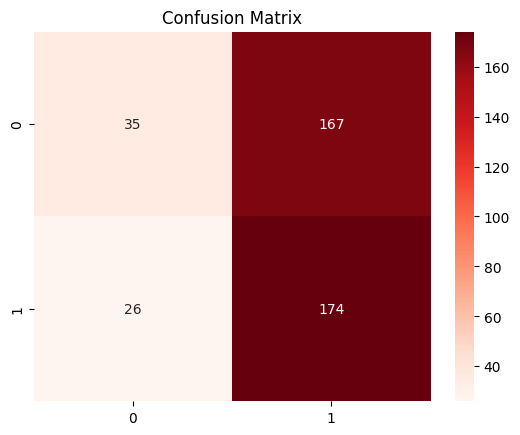

In [89]:
#confusion matrix for logistic regression model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [90]:
import warnings
warnings.filterwarnings('ignore')
#classification report for logistic regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.17      0.27       202
           1       0.51      0.87      0.64       200

    accuracy                           0.52       402
   macro avg       0.54      0.52      0.45       402
weighted avg       0.54      0.52      0.45       402



In [81]:
from sklearn.neural_network import MLPClassifier

#creating MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

#training the model with training data
mlp_model.fit(X_train, y_train)

#cross-validation
cv_scores = cross_val_score(mlp_model, X, y, cv=5)
average_cv_accuracy = np.mean(cv_scores)
print(f"Average Cross-Validation Accuracy: {average_cv_accuracy}")

#evaluating the model on the test set
y_pred = mlp_model.predict(X_test)
accuracy = mlp_model.score(X_test, y_test)
print(f"Test Set Accuracy: {accuracy}")

Average Cross-Validation Accuracy: 0.5007462686567165
Test Set Accuracy: 0.5024875621890548


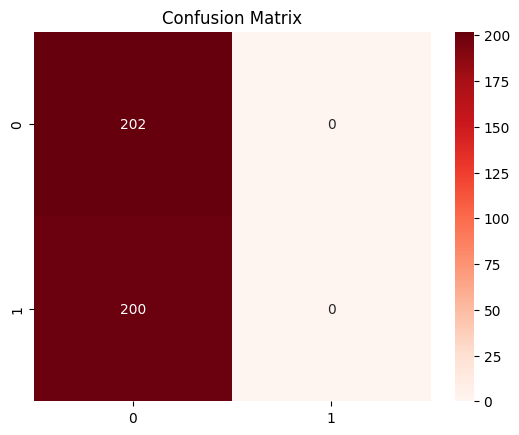

In [82]:
#confusion matrix for MPClassifier model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [91]:
import warnings
warnings.filterwarnings('ignore')
#classification report for logistic regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.17      0.27       202
           1       0.51      0.87      0.64       200

    accuracy                           0.52       402
   macro avg       0.54      0.52      0.45       402
weighted avg       0.54      0.52      0.45       402

